## 1. Introduction

Japanese animation, or anime, has transcended boundaries and exploded in popularity in recent years. Once a niche interest in the West, a 2023 survey reveals a dedicated viewership: 25% of Millennials and a staggering 42% of Gen Zs watch anime weekly. This trend aligns with projections of the anime industry reaching a massive $62.7 billion by 2032. Anime's cultural impact extends beyond viewership - celebrities and artists openly reference it, further solidifying its place in popular culture. However, popularity paints an incomplete picture. As anime embeds itself within the next generation's cultural landscape, a critical data gap emerges. This has sparked an interest in answering the question: What makes anime appeal with viewers? 
    
Specifically recognizing that fan preferences constantly evolve, we want to know past trends and also predict what qualities resonate with viewers. Essentially, this study seeks to anticipate what stories and styles will capture audiences in this ever-evolving landscape of anime. Further analysis can reveal hidden connections between genres and popularity and can be leveraged to know which contents are more likely to be successful. Combining these findings from quantitative research with external qualitative research can offer a more complete understanding of anime's impact and its influence within society. Overall, this study will attempt to uncover any relationships between variables of anime and other factors. 

## 2. DATA PROCESSING:

The initial stage of our process involves searching Kaggle for relevant data on anime. We'll focus on obtaining information about the top anime series and their rankings from various sources on Kaggle. Fortunately, Kaggle provides datasets on anime series, including details on ratings and popularity. We'll also utilize Kaggle datasets listing anime creators and their affiliations to gather information on the popularity counts for each series.

In [115]:
import pandas as pd
import numpy as np

df = pd.read_csv("animes.csv")

Before we can actually analyze the data, we first must clean and process it into a format that will allows us to easily access the data points. We dropped of the empty or incomplete entries and removed potential duplicates. All of the data columns were string types when the csv file was initally read, so we had to convert them into the appropiate type. 

We first changed the type of the 'members' and 'popularity' columns into integers. We then converted the string in the 'genre' column back into string arrays, so we can analyze it later. 

Finally, we realized that the format for 'aired' column was inconsistent due to it originally being a string that comprises of two dates. However, this leads to the problem where some animes only aired for a single day and some of the dates were missing either the day or month. In order to remedy this, we are only going to check when the anime first aired. We also will use regex to check every date and if it is missing, we will be adding in missing numbers by adding '1' for missing day and 'January' for missing month. We then converted all of the columns into datetime type so we can compare and filter it later. 


In [116]:
import matplotlib.pyplot as plt
import scipy
import re

df = df.drop_duplicates()
df = df.dropna()
df['members'] = df['members'].astype(int)
df['popularity'] = df['popularity'].astype(int)
df['genre'] = df['genre'].apply(eval)
df = df.drop('img_url', axis=1)
df = df.drop('link', axis=1)
df['aired'] = df['aired'].str.split(' to ').str[0]

def parse_date(date_str):
    formats = [r'^\w+ \d+\, \d{4}$', r'^\w+ \d{4}$', r'^\d{4}$']
    for fmt in formats:
      x = re.search(fmt, date_str)
      if (x):
        x = str(x.group())
        if fmt == r'^\w+ \d{4}$':
          x = x.replace(" ", " 1, ")
        elif fmt == r'^\d{4}$':
          x = "January 1, "+ x
      return pd.to_datetime(x)
    return pd.NaT
df['aired'] = df['aired'].apply(parse_date)
df = df.dropna()
display(df)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",2015-10-04,25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",2014-10-10,22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",2017-07-07,13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",2009-04-05,64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",2017-01-06,1.0,214621,502,22.0,8.83
...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"[Action, Comedy, Super Power, Martial Arts, Sh...",2011-01-01,1.0,34155,2382,1728.0,7.50
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"[Slice of Life, Comedy, Supernatural]",2018-01-12,12.0,61459,1648,1727.0,7.50
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","[Slice of Life, Comedy, Shounen]",2011-09-27,12.0,67422,1547,1548.0,7.56
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",[Action],2016-07-09,1.0,41077,2154,1544.0,7.56


## 3. Exploratory data analysis

1. We are now firstly going to do a Z test to see if the avg score for animes with the Action genre is greater then 7
- Z-Test Hypothesis:
- HA: The mean score of Anime with "Action" genre will be greater or equal to 7  
- H0: The mean score of Anime with "Action" genre will be less than 7
 

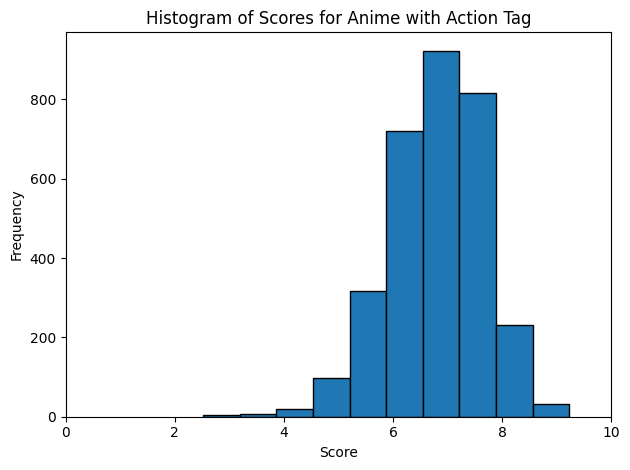

Median score of Action entries: 6.84
Estimated p-value (One-tailed test): 0.4055449187072703
The result is not statistically significant (fail to reject null hypothesis).


In [117]:
action_entries = df[df['genre'].apply(lambda x: 'Action' in x)]
mean = action_entries['score'].mean()
std_dev = action_entries['score'].std()
plt.hist(action_entries['score'], bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Anime with Action Tag')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()
median_score = action_entries['score'].median()
print("Median score of Action entries:", median_score)
score_value = 7
z_score = (score_value - mean) / std_dev
p_value = 1 - scipy.stats.norm.cdf(z_score)
print("Estimated p-value (One-tailed test):", p_value)
if p_value < 0.05:
    print("The result is statistically significant (reject null hypothesis).")
else:
    print("The result is not statistically significant (fail to reject null hypothesis).")


In Conclusion since the graph is skewed, we can use the median as an indicator, and the median of every Action anime's score is 6.88 which is below 7. We also look at the p-value and since it is above 0.05, we fail to reject the null hypothesis.

2. Next we will conduct a boxplot to see if we have any outliers in our data when it comes to scores of animes 

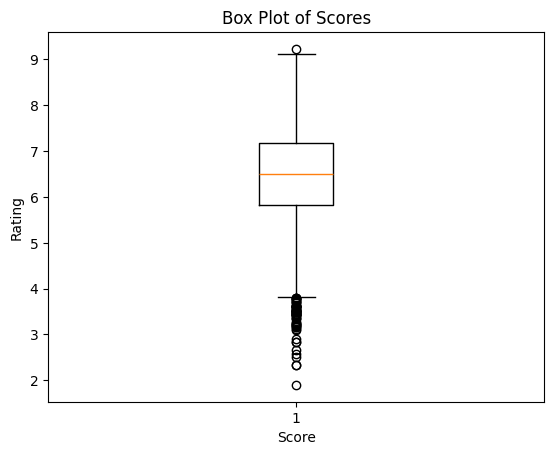

Number of lower outliers: 62


In [118]:
score_data = df['score'].dropna()
plt.boxplot(score_data)
plt.xlabel('Score')
plt.ylabel('Rating')
plt.title('Box Plot of Scores')
plt.show()
q1 = score_data.quantile(0.25)
q3 = score_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
lower_outliers = df[df['score'] < lower_bound].shape[0]
print(f"Number of lower outliers: {lower_outliers}")

There are 62 lower outliers when it comes to score of anime and one higher outlier, suggesting that anime is generally well received as when there are outliers or bad anime, it is a noticable exception. 

3. The most common genre amongst the top 100 ranked animes is 'Drama' with 50 entries, followed by 'Action' tied for second with 46, and 'Comedy' and 'Shounen' being tied for third. 


{'Action': 39, 'Military': 6, 'Adventure': 22, 'Comedy': 44, 'Drama': 47, 'Magic': 4, 'Fantasy': 19, 'Shounen': 40, 'Thriller': 7, 'Sci-Fi': 27, 'Super Power': 8, 'Romance': 13, 'Supernatural': 36, 'School': 17, 'Mystery': 21, 'Historical': 24, 'Parody': 12, 'Samurai': 12, 'Space': 3, 'Game': 2, 'Seinen': 13, 'Slice of Life': 23, 'Sports': 9, 'Mecha': 6, 'Vampire': 5, 'Demons': 6, 'Music': 1, 'Josei': 2, 'Martial Arts': 1, 'Horror': 2, 'Police': 3, 'Psychological': 7, 'Shoujo': 5, 'Dementia': 1}


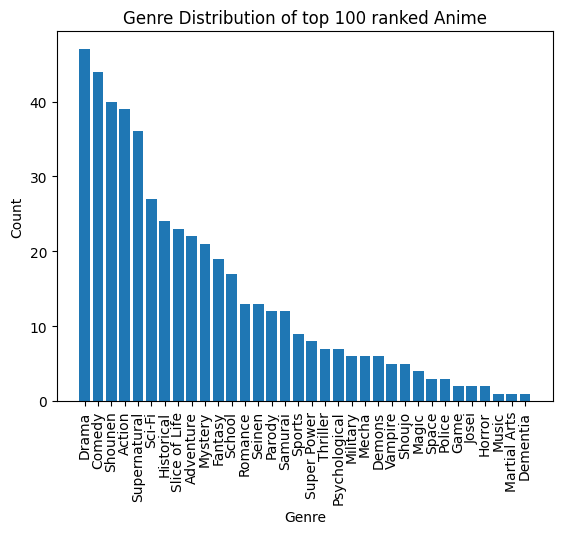

In [119]:
lowest_ranked = df.nsmallest(100, 'ranked')
def g(df):
   #df['genre'] = df['genre'].apply(eval)
   return df
df2 = g(lowest_ranked)
genre_counts = {}
def f(df):
  for genres in df['genre']:
    for genre in genres:
      if genre in genre_counts:
        genre_counts[genre] += 1
      else:
        genre_counts[genre] = 1
  return genre_counts
genre_counts = f(df2)
print(genre_counts)

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_names, genre_counts = zip(*sorted_genres)

# Create a bar chart
plt.bar(genre_names, genre_counts)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution of top 100 ranked Anime")
plt.xticks(rotation=90) 

plt.show()

### Conclusion from our analysis:

The bulk of what we were looking for involves the 'score' value for an anime. The anime data combines numerics, text, and genre lists, requiring various analysis techniques. The skewed score distribution with outliers suggests non-parametric tests and outlier handling. Genres call for techniques that handle categorical variables for exploring relationships with other features

## 4. ML

Theses are the packages we are going to use to conduct our ML in

In [120]:
# Make sure to install the necessary modules to import!
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer


The provided code is performing a simple linear regression analysis using the 'popularity' feature to predict the 'score'.

First, it selects the 'popularity' column from the DataFrame df and reshapes it into a 2D array, which is the required input shape for the scikit-learn model. The target variable 'score' is also selected.

Then, it creates an instance of the LinearRegression model from scikit-learn.

The model is trained using the fit method, with 'popularity' as the predictor and 'score' as the target variable.

After training, the model's performance is evaluated using the coefficient of determination which is R^2. Since our value is 0.521 there is no real relationship between the score and popularity of anime.

In [121]:
# Select relevant features
X = df['popularity'].values.reshape(-1, 1)  # Reshape to make it a 2D array
y = df['score'].values
# Create the model
model = LinearRegression()

# Train the model
model.fit(X, y)
# Evaluate the model
r_squared = model.score(X, y)
print("R-squared:", r_squared)


R-squared: 0.5215385297833737


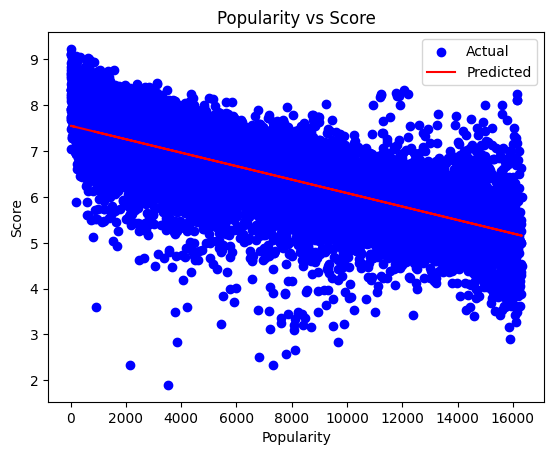

In [122]:
# Predict y values
y_pred = model.predict(X)

# Create a scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Predicted')

# Add labels and title
plt.xlabel('Popularity')
plt.ylabel('Score')
plt.title('Popularity vs Score')
plt.legend()

# Show the plot
plt.show()

In this model there is a greater trend where ranking and score have a somewhat higher/ stronger relationship with each other

R-squared: 0.769084166924181


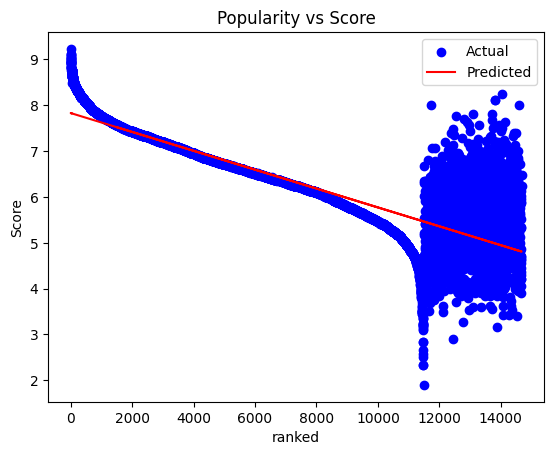

In [123]:


# Select relevant features
X = df['ranked'].values.reshape(-1, 1)  # Reshape to make it a 2D array
y = df['score'].values
# Create the model
model = LinearRegression()

# Train the model
model.fit(X, y)
# Evaluate the model
r_squared = model.score(X, y)
print("R-squared:", r_squared)


# Predict y values
y_pred = model.predict(X)

# Create a scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Predicted')

# Add labels and title
plt.xlabel('ranked')
plt.ylabel('Score')
plt.title('Popularity vs Score')
plt.legend()

# Show the plot
plt.show()

Now a lot of the rows a had missing data so we need to clean up and drop them so that we can run our linear regression model through it

In [126]:
# Use MultiLabelBinarizer to encode genres
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Concatenate the encoded genres with the original dataframe
data_encoded = pd.concat([df, genre_df], axis=1)

# Select relevant features (genres) and target variable (score)
X_genres = data_encoded.drop(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members', 'popularity', 'ranked', 'score'], axis=1)
y_genres = data_encoded['score']

# Check for missing values in y_genres
missing_values = y_genres.isnull().sum()
print("Number of missing values in y_genres:", missing_values)

if missing_values > 0:
    print("Removing rows with missing values...")
    data_encoded.dropna(subset=['score'], inplace=True)
    X_genres = data_encoded.drop(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members', 'popularity', 'ranked', 'score'], axis=1)
    y_genres = data_encoded['score']
    
# Fill missing values in X_genres
X_genres.fillna(X_genres.mean(), inplace=True)

# Remove rows with missing values in y_genres
data_encoded.dropna(subset=['score'], inplace=True)
y_genres = data_encoded['score']

Number of missing values in y_genres: 3810
Removing rows with missing values...


After cleaning up we will now train and see the top 10 genres that have the most impact on anime's scores

In [128]:
# Create the model
model_genres = LinearRegression()
X_genres.fillna(X_genres.mean(), inplace=True)

# Train the model
model_genres.fit(X_genres, y_genres)

# Evaluate the model
r_squared_genres = model_genres.score(X_genres, y_genres)
print("R-squared for genres:", r_squared_genres)

# Get the coefficients
coefficients = pd.Series(model_genres.coef_, index=X_genres.columns)

# Sort coefficients by magnitude
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Print the top 10 genres that have the most impact on the score
print("Top 10 genres affecting the score:")
print(sorted_coefficients.head(10))

R-squared for genres: 0.049172047978348066
Top 10 genres affecting the score:
Josei            0.480733
Thriller         0.343356
Mystery          0.318243
Psychological    0.276766
Police           0.249901
Horror           0.242606
Shounen          0.232223
Music            0.227896
Cars             0.226992
Dementia         0.208349
dtype: float64


We are now going to plot the top ten genres to get more of a visual representation of what our model found

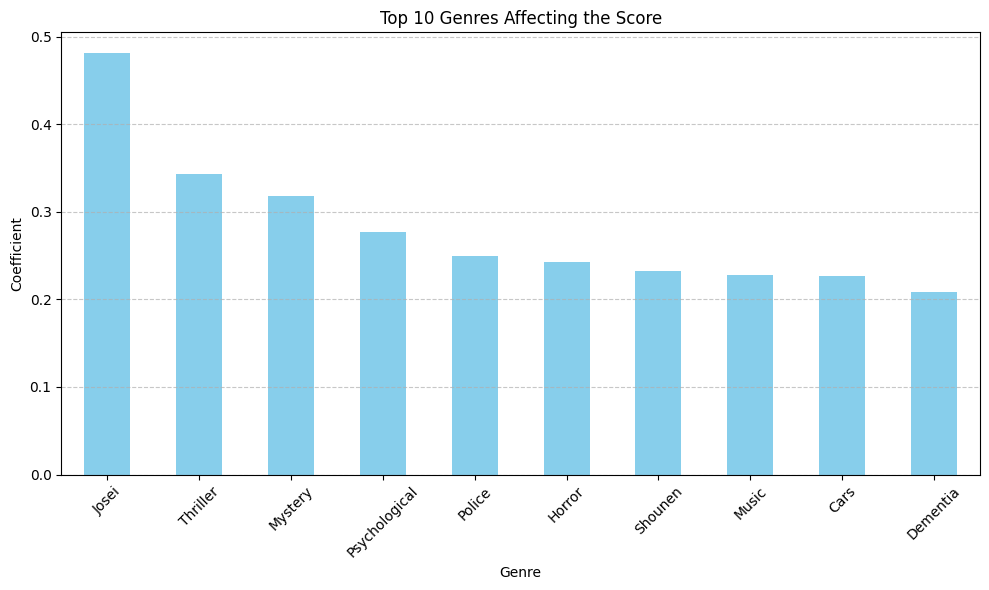

In [125]:
# Plot the coefficients
plt.figure(figsize=(10, 6))
sorted_coefficients.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres Affecting the Score')
plt.xlabel('Genre')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()